In [68]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [69]:
url = 'https://opendata-ajuntament.barcelona.cat/data/dataset/5334c15e-0d70-410b-85f3-d97740ffc1ed/resource/6f1fb778-0767-478b-b332-c64a833d26d2/download/precipitacionsbarcelonadesde1786.csv'
df = pd.read_csv(url, sep=',')

In [70]:
df.head(100)

,Any,Precip_Acum_Gener,Precip_Acum_Febrer,Precip_Acum_Marc,Precip_Acum_Abril,Precip_Acum_Maig,Precip_Acum_Juny,Precip_Acum_Juliol,Precip_Acum_Agost,Precip_Acum_Setembre,Precip_Acum_Octubre,Precip_Acum_Novembre,Precip_Acum_Desembre
0,1786,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1881,107.3,96.8,13.1,85.1,12.9,4.7,0.2,21.1,138.4,45.2,2.2,44.7
96,1882,48.5,103.1,15.8,83.7,15.4,13.6,28.4,90.0,155.1,78.7,0.6,54.8
97,1883,69.4,34.6,42.9,63.8,24.1,49.0,20.6,0.0,70.2,102.8,38.0,27.4
98,1884,20.4,58.2,93.9,89.9,63.3,100.9,9.7,19.4,90.5,41.5,52.8,55.9


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   237 non-null    int64  
 1   Precip_Acum_Gener     237 non-null    float64
 2   Precip_Acum_Febrer    237 non-null    float64
 3   Precip_Acum_Marc      237 non-null    float64
 4   Precip_Acum_Abril     237 non-null    float64
 5   Precip_Acum_Maig      237 non-null    float64
 6   Precip_Acum_Juny      237 non-null    float64
 7   Precip_Acum_Juliol    237 non-null    float64
 8   Precip_Acum_Agost     237 non-null    float64
 9   Precip_Acum_Setembre  237 non-null    float64
 10  Precip_Acum_Octubre   237 non-null    float64
 11  Precip_Acum_Novembre  237 non-null    float64
 12  Precip_Acum_Desembre  237 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.2 KB


In [72]:
df.shape

(237, 13)

In [73]:
df.describe()

,Any,Precip_Acum_Gener,Precip_Acum_Febrer,Precip_Acum_Marc,Precip_Acum_Abril,Precip_Acum_Maig,Precip_Acum_Juny,Precip_Acum_Juliol,Precip_Acum_Agost,Precip_Acum_Setembre,Precip_Acum_Octubre,Precip_Acum_Novembre,Precip_Acum_Desembre
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1904.000000,38.144304,34.665823,48.943038,53.800844,53.712236,37.213924,26.152743,39.313080,78.498734,78.824895,58.221941,43.159916
std,68.560193,38.542102,36.135240,38.179956,36.943707,40.515014,32.368797,28.068011,34.834177,55.947514,59.213156,51.469885,45.123746
min,1786.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.500000,0.000000,0.000000
25%,1845.000000,12.300000,10.600000,21.600000,25.800000,25.000000,12.700000,4.800000,12.000000,36.100000,37.900000,20.100000,13.100000
50%,1904.000000,27.400000,25.500000,39.000000,45.800000,44.700000,31.800000,16.400000,30.400000,67.000000,64.000000,44.600000,31.200000
75%,1963.000000,52.100000,46.700000,69.600000,76.700000,72.700000,51.400000,38.600000,58.900000,103.700000,103.800000,78.200000,55.900000
max,2022.000000,262.400000,275.100000,188.500000,258.700000,235.100000,183.300000,163.200000,196.200000,338.500000,328.600000,330.400000,365.800000


Mirem els Nan i els duplicats

In [74]:
df.isnull().sum()

Any                     0
Precip_Acum_Gener       0
Precip_Acum_Febrer      0
Precip_Acum_Marc        0
Precip_Acum_Abril       0
Precip_Acum_Maig        0
Precip_Acum_Juny        0
Precip_Acum_Juliol      0
Precip_Acum_Agost       0
Precip_Acum_Setembre    0
Precip_Acum_Octubre     0
Precip_Acum_Novembre    0
Precip_Acum_Desembre    0
dtype: int64

In [75]:
df.isna().sum()

Any                     0
Precip_Acum_Gener       0
Precip_Acum_Febrer      0
Precip_Acum_Marc        0
Precip_Acum_Abril       0
Precip_Acum_Maig        0
Precip_Acum_Juny        0
Precip_Acum_Juliol      0
Precip_Acum_Agost       0
Precip_Acum_Setembre    0
Precip_Acum_Octubre     0
Precip_Acum_Novembre    0
Precip_Acum_Desembre    0
dtype: int64

In [76]:
df.duplicated().sum()

0

Reanomenem les noves columnes amb noms més senzills.

In [77]:
df.rename(columns={'Precip_Acum_Gener': 'Gener', 'Precip_Acum_Febrer': 'Febrer', 'Precip_Acum_Marc': 'Marc', 'Precip_Acum_Abril': 'Abril', 'Precip_Acum_Maig': 'Maig', 'Precip_Acum_Juny': 'Juny', 'Precip_Acum_Juliol': 'Juliol', 'Precip_Acum_Agost': 'Agost', 'Precip_Acum_Setembre': 'Setembre', 'Precip_Acum_Octubre': 'Octubre', 'Precip_Acum_Novembre': 'Novembre', 'Precip_Acum_Desembre': 'Desembre'}, inplace=True)
df

,Any,Gener,Febrer,Marc,Abril,Maig,Juny,Juliol,Agost,Setembre,Octubre,Novembre,Desembre
0,1786,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2018,63.6,104.6,112.5,83.0,30.3,53.1,51.5,36.5,44.4,201.9,201.8,4.8
233,2019,18.2,4.6,0.3,36.2,109.0,19.3,75.8,23.1,71.5,83.2,39.4,119.2
234,2020,89.3,2.8,61.6,258.7,29.2,69.1,23.1,12.4,60.2,23.1,52.5,41.5
235,2021,26.2,26.5,7.7,62.7,13.4,7.8,9.0,8.3,23.3,63.2,75.9,3.8


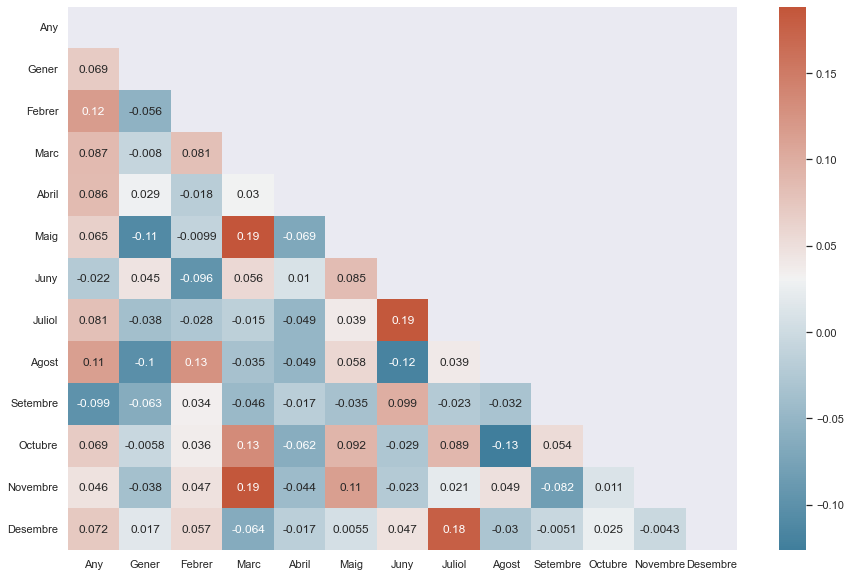

In [78]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

Text(0.5, 0.98, 'Distribució de les variables numèriques')

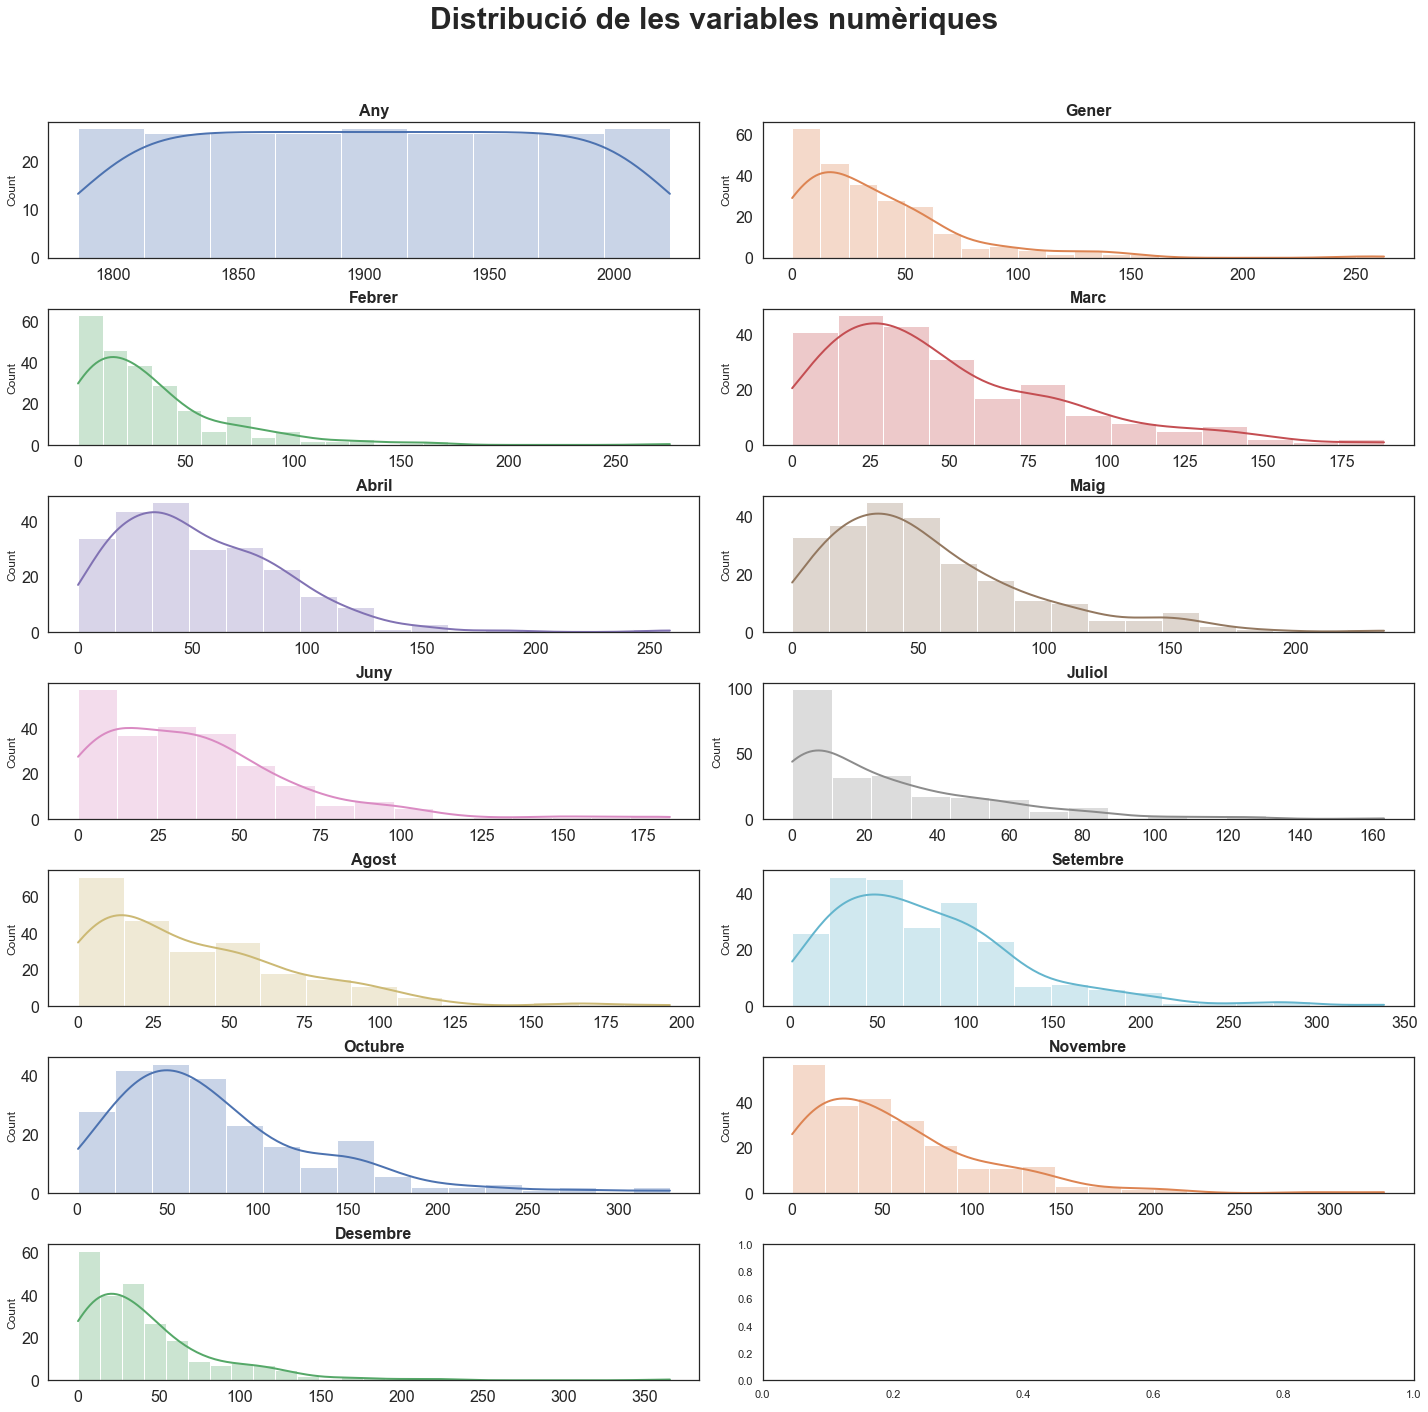

In [79]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(20, 20))
axes = axes.flat

for i, colum in enumerate(df):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les variables numèriques', fontsize = 30, fontweight = "bold")

<Figure size 432x216 with 0 Axes>

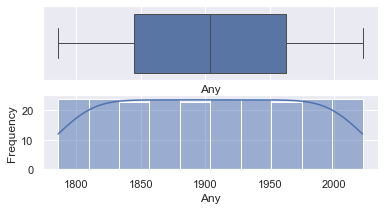

<Figure size 432x216 with 0 Axes>

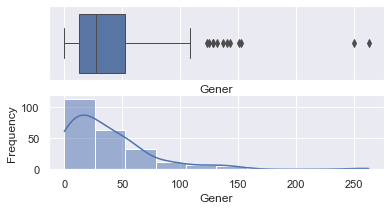

<Figure size 432x216 with 0 Axes>

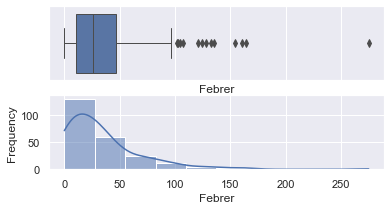

<Figure size 432x216 with 0 Axes>

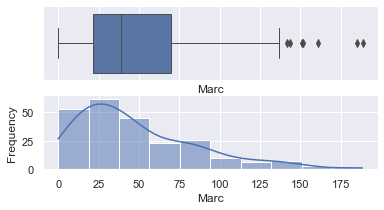

<Figure size 432x216 with 0 Axes>

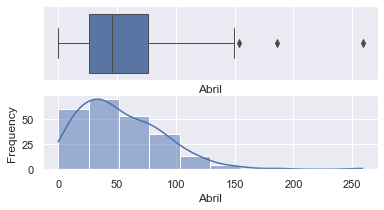

<Figure size 432x216 with 0 Axes>

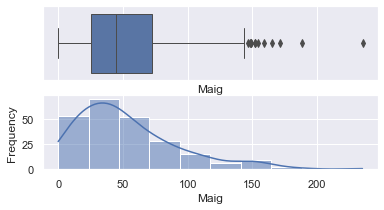

<Figure size 432x216 with 0 Axes>

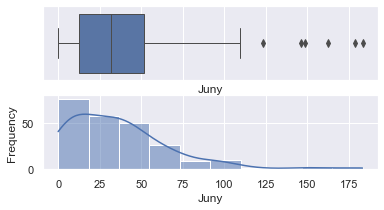

<Figure size 432x216 with 0 Axes>

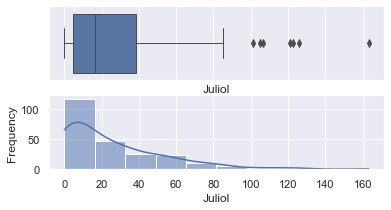

<Figure size 432x216 with 0 Axes>

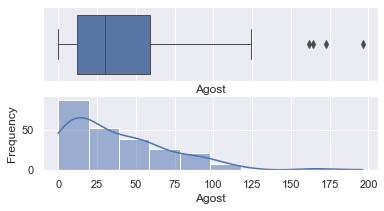

<Figure size 432x216 with 0 Axes>

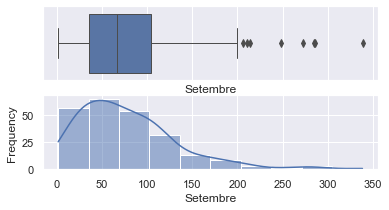

<Figure size 432x216 with 0 Axes>

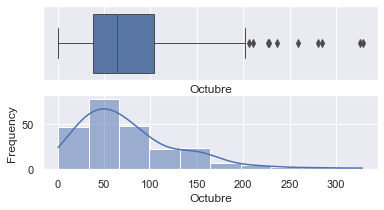

<Figure size 432x216 with 0 Axes>

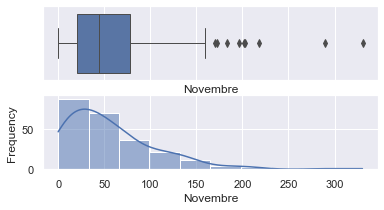

<Figure size 432x216 with 0 Axes>

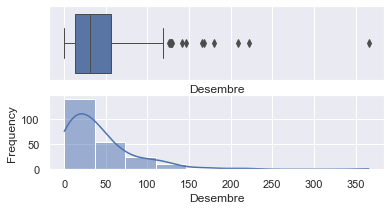

In [80]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(6, 3)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [87]:
mes_pluja = df.iloc[:, 1:].mean().nlargest(5)
print("Els 5 mesos amb més pluja són:", mesi_piovosi)

Els 5 mesos amb més pluja són: Index(['Octubre', 'Desembre', 'Febrer', 'Gener', 'Novembre'], dtype='object')


In [88]:
menys_pluja = df.iloc[:, 1:].mean().nsmallest(5)
print("Els 5 mesos amb menys pluja són: ", menys_pluja)

Els 5 mesos amb menys pluja són:  Juliol    26.152743
Febrer    34.665823
Juny      37.213924
Gener     38.144304
Agost     39.313080
dtype: float64


In [91]:
anys_pluja = df.iloc[:, 1:].sum(axis=1).nlargest(5).index
anys_plujaV = df.loc[anys_pluja, 'Any'].values

print("Els 5 anys amb més pluja són:", anys_plujaV)

Els 5 anys amb més pluja són: [1971 1901 2018 1996 1987]


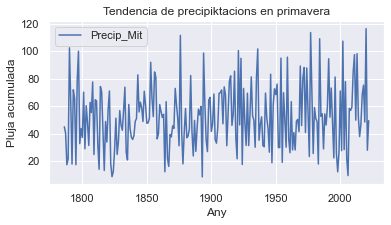

In [93]:
df['Precip_Mit'] = df[['Marc', 'Abril', 'Maig']].mean(axis=1)
df.plot(x='Any', y='Precip_Mit', kind='line')
plt.xlabel('Any')
plt.ylabel('Pluja acumulada')
plt.title('Tendencia de precipitacions en primavera')
plt.show()

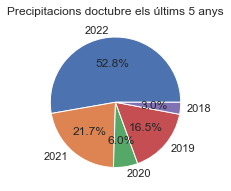

In [106]:
ultim5 = df['Any'].nlargest(5)
sum_pluja = df.loc[df['Any'].isin(ultim5), 'Octubre'].sum()
proportions = df.loc[df['Any'].isin(ultim5), 'Octubre'] / sum_pluja
fig, ax = plt.subplots()
ax.pie(proportions, labels=ultim5, autopct='%1.1f%%')
ax.set_title('Precipitacions doctubre els últims 5 anys')
plt.show()



Observant els gràfics anteriors sembla ser a priori que la distribució que hem vist no sigui gaussiana per la majoria de les variables, tot i així fem un shapiro test per assegurar-nos i comprovar-ho matemàticament.

In [45]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  Any amb un p-value de  8.674460900692793e-07
Podem rebutjar l'hipotesis nula

Per la variable  Gener amb un p-value de  9.851019646347115e-17
Podem rebutjar l'hipotesis nula

Per la variable  Febrer amb un p-value de  5.710843699409772e-17
Podem rebutjar l'hipotesis nula

Per la variable  Marc amb un p-value de  2.556817604859596e-11
Podem rebutjar l'hipotesis nula

Per la variable  Abril amb un p-value de  5.000893588125166e-10
Podem rebutjar l'hipotesis nula

Per la variable  Maig amb un p-value de  1.672689937948224e-11
Podem rebutjar l'hipotesis nula

Per la variable  Juny amb un p-value de  2.1654408138577913e-13
Podem rebutjar l'hipotesis nula

Per la variable  Juliol amb un p-value de  2.9316727217636738e-15
Podem rebutjar l'hipotesis nula

Per la variable  Agost amb un p-value de  2.0186343915873373e-12
Podem rebutjar l'hipotesis nula

P

Basant-nos en els gràfics anteriors i en el shapiro test aplicarem el següent:
    
- Estandardització per l'única gaussiana ('Any')

- RobustScaler per les que contenen outliers (tots els mesos)


In [65]:

columnsRobust = ['Gener', 'Febrer', 'Marc', 'Abril','Maig','Juny', 'Juliol','Agost','Setembre', 'Novembre','Desembre']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

columnsEstd= ['Any']
scaler = preprocessing.StandardScaler().fit(df[columnsEstd])
df[columnsEstd] = scaler.transform(df[columnsEstd])